<a href="https://colab.research.google.com/github/chogerlate/cpe342/blob/main/cpe342_a02_1052.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A01: Siwarat Laoprom 65070501052

# Project setup

In [1]:
!gdown https://drive.google.com/uc?id=13k4WwdwKGBtaCsqSStr3rWxe2pfpTvbk

Downloading...
From: https://drive.google.com/uc?id=13k4WwdwKGBtaCsqSStr3rWxe2pfpTvbk
To: /content/A2.csv
100% 3.75k/3.75k [00:00<00:00, 9.70MB/s]


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('/content/A2.csv')
df.head()

,X,Y
0,4.072280,0.981321
1,1.724332,1.124653
2,1.901981,1.042435
3,4.914068,0.949332
4,1.165868,1.186925


# Experiment configuration

In [102]:
class hyperparameter():
  seed = 42 # random seed value for numpy
  learning_rate = 1e-3 # learning rate, 1e-3 is the optimal value for this experiment.
  n_iterations = 10000 # number of iterations

hyper = hyperparameter()
np.random.seed(hyper.seed)

# Task 1
## 1. Write the error/loss function.

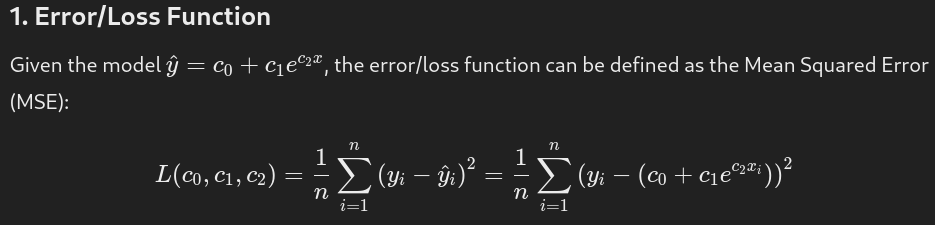

In [ ]:
def mean_squared_error(y_true, y_pred):
    mse = np.mean(np.power(y_true-y_pred, 2))
    return mse

# Model
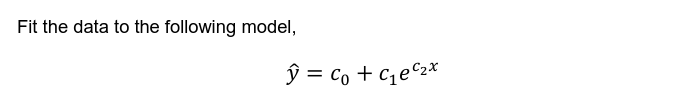

In [103]:
class NonLinearRegression():
    def __init__(self):
        self.c0 = np.random.uniform(0,1) # initial random weight for c0
        self.c1 = np.random.uniform(0,1) # initial random weight for c1
        self.c2 = np.random.uniform(0,1) # initial random weight for c2

    def __call__(self, x):
        return self.c0 + self.c1 * np.exp(self.c2 * x)


In [104]:
model = NonLinearRegression()

# Task 2-4
## 2.Write the gradient of each coefficients. (3 points)
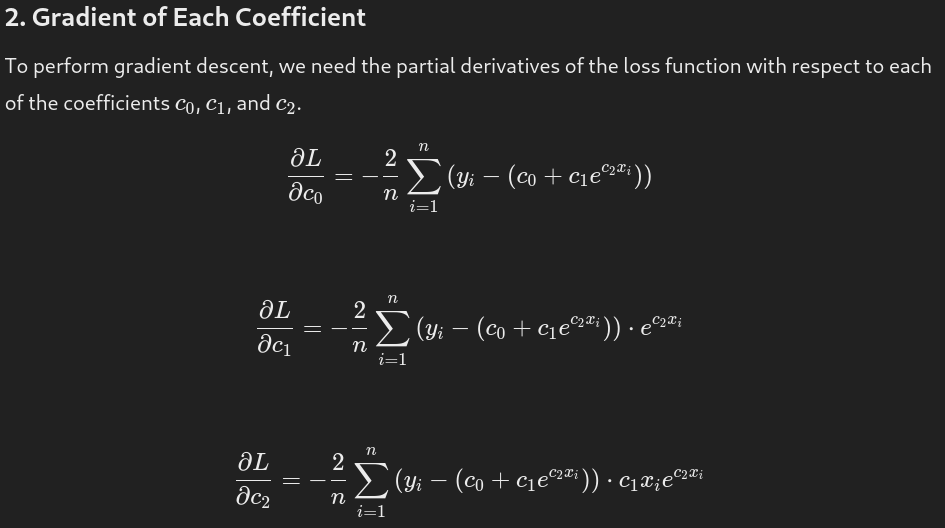
## 3.Write the update rules. (1 points)
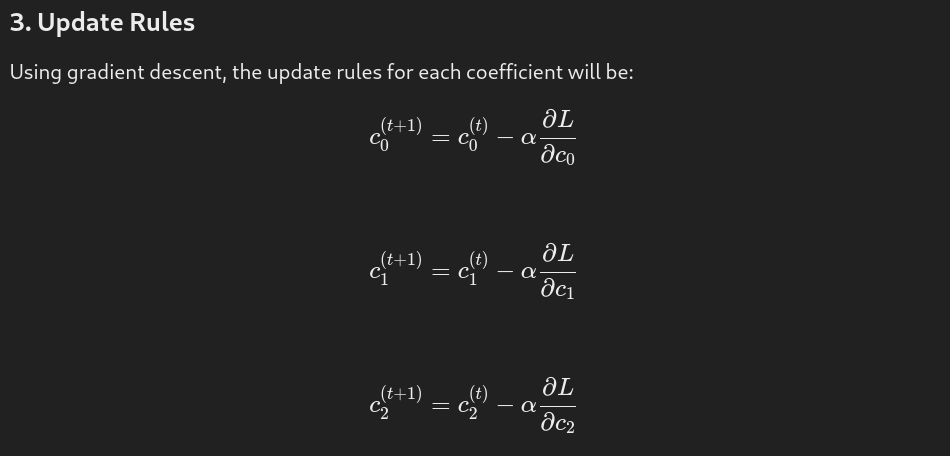
## 4.Implement the gradient descent using the given data. (4 points)

In [105]:
learning_rate = hyper.learning_rate
n_iterations = hyper.n_iterations
loss_values = []
c0_values, c1_values, c2_values = [], [], []
n = len(df)
x = df['X']
y = df['Y']

# start training loop
for i in tqdm(range(1, n_iterations+1)):
  y_pred = model(df['X'])
  loss = mean_squared_error(df['Y'], y_pred)

  # save the loss and parameter values for the final experiment result plot
  loss_values.append(loss)
  c0_values.append(model.c0)
  c1_values.append(model.c1)
  c2_values.append(model.c2)

  # Compute the gradients
  dL_dc0 = -(2/n) * np.sum(y - y_pred)
  dL_dc1 = -(2/n) * np.sum((y - y_pred) * np.exp(model.c2 * x))
  dL_dc2 = -(2/n) * np.sum((y - y_pred) * model.c1 * x * np.exp(model.c2 * x))

  # Update the coefficients
  model.c0 -= learning_rate * dL_dc0
  model.c1 -= learning_rate * dL_dc1
  model.c2 -= learning_rate * dL_dc2

  if i % 100 == 0:
    print(f'Iteration {i}: Loss = {loss}')


  0%|          | 0/10000 [00:00<?, ?it/s]

Iteration 0: Loss = 203.94844921211333
Iteration 100: Loss = 0.3219702037467593
Iteration 200: Loss = 0.2150788384604586
Iteration 300: Loss = 0.1443161911475251
Iteration 400: Loss = 0.09748241764939326
Iteration 500: Loss = 0.06648848908133281
Iteration 600: Loss = 0.04597456278476332
Iteration 700: Loss = 0.03239138753044928
Iteration 800: Loss = 0.023390024976809497
Iteration 900: Loss = 0.017416726037654092
Iteration 1000: Loss = 0.013444208116510547
Iteration 1100: Loss = 0.010793542812034033
Iteration 1200: Loss = 0.00901618377069115
Iteration 1300: Loss = 0.007815877765810702
Iteration 1400: Loss = 0.006997004790520246
Iteration 1500: Loss = 0.0064304193321195425
Iteration 1600: Loss = 0.006030873619394896
Iteration 1700: Loss = 0.005742101408442471
Iteration 1800: Loss = 0.005526966176166898
Iteration 1900: Loss = 0.005360956030834351
Iteration 2000: Loss = 0.005227889454101242
Iteration 2100: Loss = 0.005117081069657887
Iteration 2200: Loss = 0.00502147135978752
Iteration 230

# Task 5
## 5.Show the loss value over iterations and the resulting coefficients. (1 points)

## Result coefficients.

In [106]:
# Final coefficients
print(f'Final coefficients: c0 = {model.c0}, c1 = {model.c1}, c2 = {model.c2}')

Final coefficients: c0 = 0.986976867914388, c1 = 0.8199335284346447, c2 = -1.071028153514576


## Loss Plot

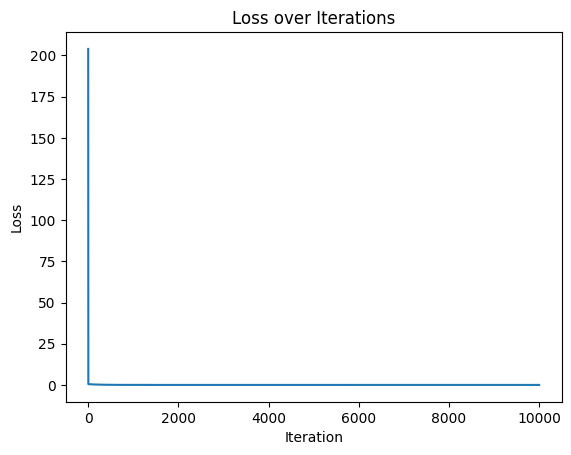

In [107]:
# Plot the loss over iterations
plt.plot(loss_values)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.show()

## Compare Actual vs Prediction Plot

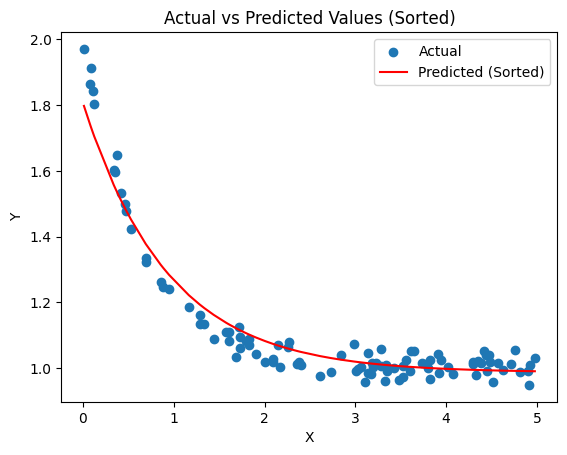

In [113]:
# Sort the values before plotting for a smooth line
sorted_indices = np.argsort(df['X'])
x_sorted = df['X'][sorted_indices]
y_pred_sorted = model(x_sorted)

# Plot the prediction line (sorted) against the actual values
plt.scatter(df['X'], df['Y'], label='Actual')
plt.plot(x_sorted, y_pred_sorted, color='red', label='Predicted (Sorted)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Actual vs Predicted Values (Sorted)')
plt.legend()
plt.show()
